# Modul 2 Persamaan Diferensial Numerik

Kembali ke [Persamaan Diferensial Numerik](./pdnum2024genap.qmd)

## Plotting Fungsi

Sebelum mulai mempelajari metode-metode untuk menyelesaikan persamaan diferensial secara numerik, kita akan membahas terlebih dahulu tentang teknis *plotting* fungsi, juga sedikit tambahan materi mengenai fungsi.

Misalnya kita punya fungsi $g(x)=2x$, suatu fungsi matematis (terkadang disebut "pure function" di dunia pemrograman). Ada dua cara untuk mendefinisikannya di Octave.

Cara pertama, yang sudah dibahas di pertemuan sebelumnya, adalah menggunakan keyword `function`:

In [9]:
function y = g(x)
  y = 2*x;
endfunction

Sehingga bisa dipanggil:

In [10]:
g(3)

ans = 6


Cara kedua, yang lebih praktis, adalah dengan membuat yang namanya ***anonymous function***. Perhatikan *syntax* berikut:

In [12]:
g = @(x) 2*x;
g(3)

ans = 6


Terlihat lebih sederhana, dan cukup mirip dengan penulisan matematis $g(x)=2x$. Sebutannya *anonymous function* karena sebenarnya fungsinya tidak memiliki nama yang tetap, kebetulan saja kali ini bisa diakses melalui variabel `g` yang menyimpannya. Secara umum, penulisannya adalah seperti berikut: 

```octave
nama_fungsi = @(input1, input2, ..., input_terakhir) rumus;
```

Sehingga misalnya kita bisa menuliskan fungsi $h(x,y) = x^2 + y^3$, lalu menghitung $h(4,5)$, sebagai berikut:

In [13]:
h = @(x,y) x^2 + y^3;
h(4,5)

ans = 141


Selanjutnya, kita akan membahas tentang *plotting*.

Misalkan kita memiliki titik-titik $(0,0)$, $(\frac{\pi}{2},1)$, $(\pi,0)$, dan $(\frac{3\pi}{2},-1)$. Kita bisa membuat dua *array*, yaitu satu *array* yang menyimpan tiap nilai x, dan satu lagi untuk menyimpan tiap nilai y.

Kemudian, kita bisa menggambar *plot* yang menyambung titik-titik tersebut dengan fungsi `plot`:

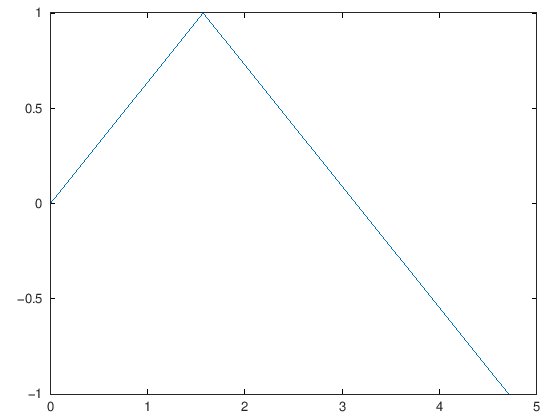

In [15]:
x = [0, pi/2, pi, 3*pi/2];
y = [0, 1, 0, -1];
plot(x,y)

Titik-titik tersebut sebenarnya adalah hasil dari fungsi $\sin(x)$ yang diterapkan pada nilai $x=0, \frac{\pi}{2}, \pi, \frac{3\pi}{2}$.

Sebenarnya, kita bisa saja hanya membuat *array* nilai x, kemudian memperoleh *array* nilai y dengan memasukkan *array* x ke dalam fungsi $\sin(x)$, agar tiap nilai pada *array* x diterapkan fungsi $\sin(x)$. Penerapan fungsi pada tiap elemen *array* seperti itu sering disebut ***broadcasting***.

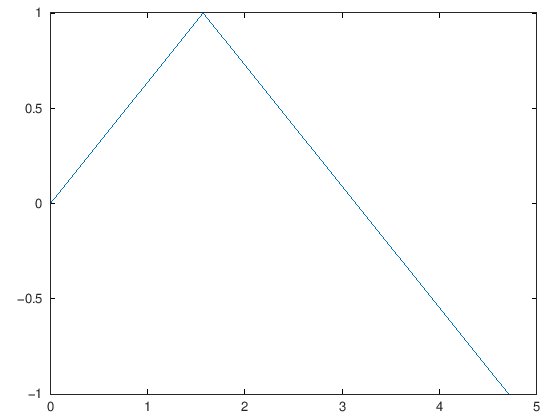

In [21]:
x = [0, pi/2, pi, 3*pi/2];
y = sin(x);
plot(x,y)

Untuk plot yang menyambung-nyambung titik-titik, plotnya sudah bagus. Namun, bagaimana kalau misalnya kita ingin membuat *plot* fungsi $\sin(x)$ itu sendiri, misalnya pada interval $[0,5]$?

Caranya, kita tinggal memperbanyak titik di *array* x tersebut, agar lebih presisi. Makin banyak titiknya, makin akurat gambarnya.

Tenang saja, kita tidak perlu pegal-pegal mengetik titik-titik $[0, 0.1, 0.2, ..., 4.9, 5]$. Di Octave, ada *syntax* untuk membuat *array* dari titik-titik pada interval $[a,b]$ dengan *step size* $h$, yaitu sebagai berikut:

```octave
nama_array = a : h : b
```

Misalnya, untuk menyimpan titik-titik pada interval $[0,5]$ dengan *step size* 0.1, ketik:

In [22]:
x = 0 : 0.1 : 5

x =

 Columns 1 through 8:

         0    0.1000    0.2000    0.3000    0.4000    0.5000    0.6000    0.7000

 Columns 9 through 16:

    0.8000    0.9000    1.0000    1.1000    1.2000    1.3000    1.4000    1.5000

 Columns 17 through 24:

    1.6000    1.7000    1.8000    1.9000    2.0000    2.1000    2.2000    2.3000

 Columns 25 through 32:

    2.4000    2.5000    2.6000    2.7000    2.8000    2.9000    3.0000    3.1000

 Columns 33 through 40:

    3.2000    3.3000    3.4000    3.5000    3.6000    3.7000    3.8000    3.9000

 Columns 41 through 48:

    4.0000    4.1000    4.2000    4.3000    4.4000    4.5000    4.6000    4.7000

 Columns 49 through 51:

    4.8000    4.9000    5.0000



Sehingga, kita bisa membuat *plot* $\sin(x)$ pada interval $[0,5]$ seperti berikut:

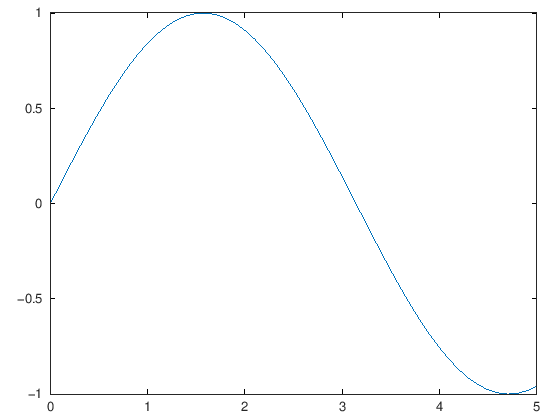

In [23]:
x = 0 : 0.1 : 5;
y = sin(x);
plot(x,y)

Kita bisa menambahkan judul pada *plot* dengan `title`

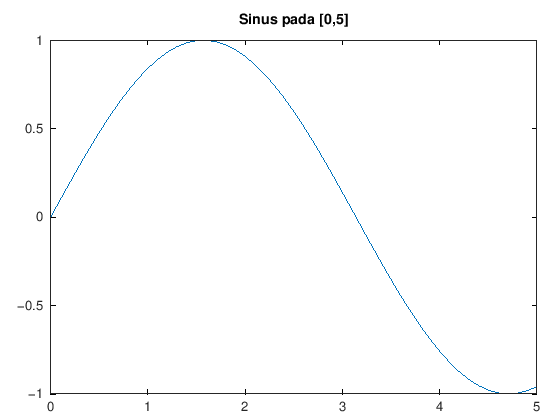

In [48]:
x = 0 : 0.1 : 5;
y = sin(x);
plot(x,y);
title("Sinus pada [0,5]");

Warnanya bisa ditentukan, misal menjadi merah ('r'), hijau ('g'), atau biru ('b'), dengan menambah keterangan di `plot`

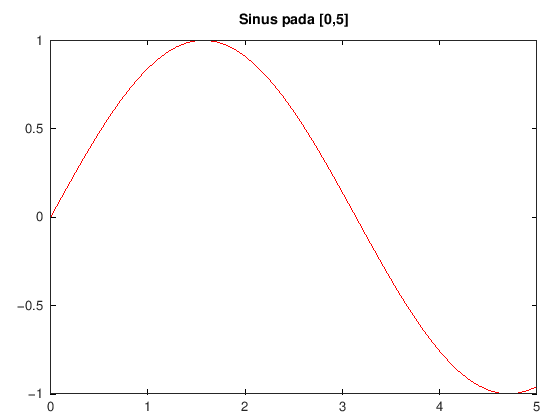

In [13]:
x = 0 : 0.1 : 5;
y = sin(x);
plot(x, y, 'r');
title("Sinus pada [0,5]");

Pilihan warna lainnya bisa dilihat di link berikut: <https://docs.octave.org/latest/Colors.html>

Kalau mau, kita bisa mem-*plot* titik-titiknya saja (tanpa disambung-sambung), menggunakan `scatter`:

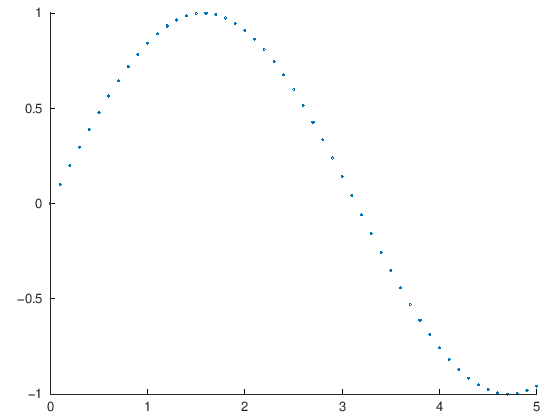

In [24]:
x = 0 : 0.1 : 5;
y = sin(x);
scatter(x,y)

Seperti di `plot`, kita juga bisa menentukan warna di `scatter`:

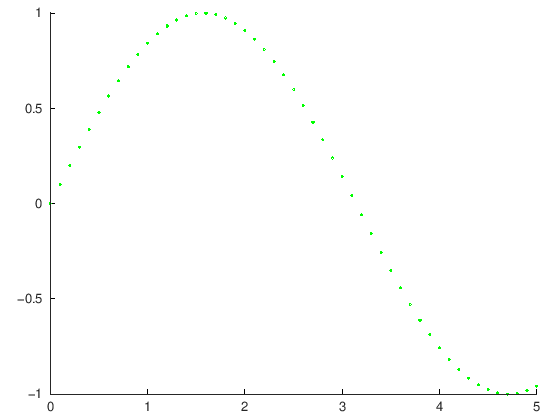

In [32]:
x = 0 : 0.1 : 5;
y = sin(x);
scatter(x, y, 'g')

Sebenarnya, ada cara yang lebih otomatis untuk mem-*plot* fungsi, yaitu menggunakan `fplot`. Kita tinggal memberikan:

- fungsi yang ingin dibuat gambarnya
- interval $[a,b]$ yang kita inginkan
- (opsional) warna yang kita inginkan

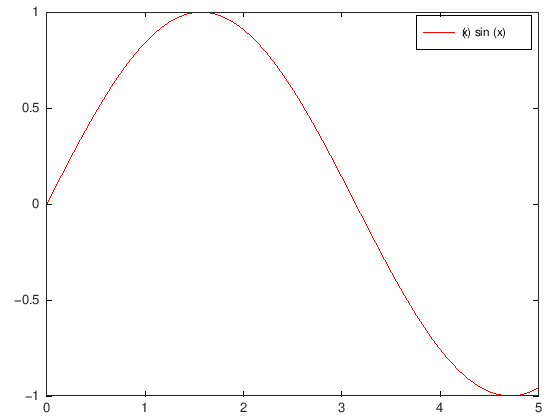

In [42]:
f = @(x) sin(x);
fplot(f, [0, 5], 'r')

Namun, cara ini khusus fungsi kontinu, bahkan langsung menambahkan keterangan yang belum tentu sesuai dengan yang kita inginkan. Agar lebih fleksibel, kita akan lebih sering menggunakan cara manual saja, yaitu dengan membuat *array* x, menghitung *array* y, dan memanggil `plot`.

Kita coba contoh lain yuk! Misalnya kita ingin membuat *plot* dari fungsi $f(x) = x^3$ pada interval $[-1,1]$. Kita bisa coba definisikan fungsinya dulu, lalu buat *array* x dan y nya:

In [26]:
f = @(x) x^3;
x = 0 : 0.1 : 5;
y = f(x);

error: for x^y, only square matrix arguments are permitted and one argument must be scalar.  Use .^ for elementwise power.
error: called from
    @<anonymous> at line 1 column 11


Lho, kok error?

Perhatikan bahwa kita memasukkan *array* x ke dalam fungsi $f(x) = x^3$. Untuk contoh yang tadi, fungsi $\sin(x)$, ketika kita memasukkan *array* x, Octave paham bahwa tiap nilai pada *array* perlu diterapkan fungsi $\sin$.

Namun, kali ini, Octave melihat bahwa ada *array* yang dipangkatkan tiga. Octave memandang *array* sebagai matriks dengan satu baris saja (atau satu kolom saja), sehingga Octave mencoba melakukan parpangkatan matriks. Padahal, syarat perpangkatan matriks adalah matriksnya harus persegi. *Array* ini bukanlah matriks persegi, sehingga jadilah *error*.

Lalu, bagaimana cara memberi tahu Octave bahwa perpangkatan yang kita maksud adalah perpangkatan per elemen (*elementwise*)?

Ada *syntax* khusus untuk itu, yaitu menggunakan `.^` daripada `^`

Mari kita coba lagi, kali ini membuat *plot* dengan *step size* 0.05:

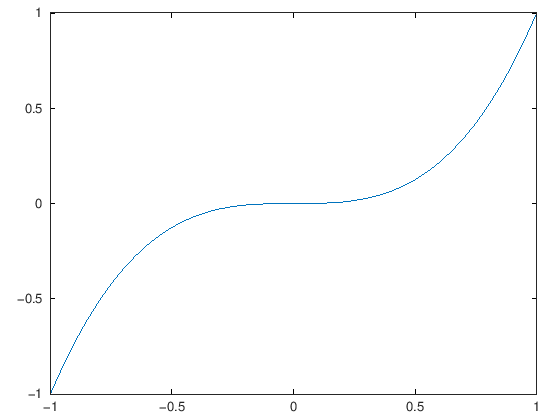

In [30]:
f = @(x) x.^3;
x = -1 : 0.05 : 1;
y = f(x);
plot(x,y)

*Fun fact:* apabila ingin menggunakan `fplot` (daripada `plot`) untuk mem-*plot* suatu fungsi, dan apabila ada perpangkatan di dalam definisi fungsi tersebut, maka penulisannya juga harus menggunakan `.^` daripada `^`

Bagaimana kalau kita mau *plot* lebih dari satu fungsi? Kita tetap membuat satu *array* x saja, lalu membuat *array* y untuk tiap fungsi, seperti berikut:

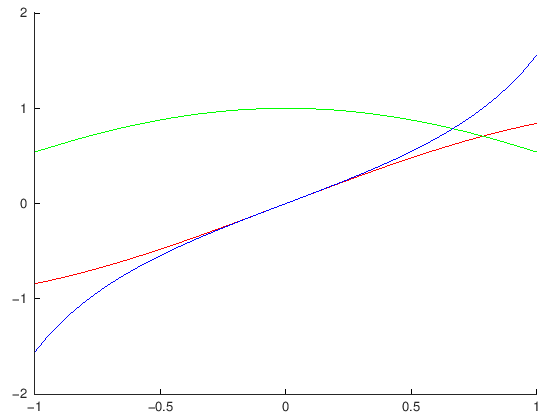

In [35]:
x = -1 : 0.05 : 1;
y1 = sin(x);
y2 = cos(x);
y3 = tan(x);
hold on;
plot(x, y1, 'r');
plot(x, y2, 'g');
plot(x, y3, 'b');

Ada baris `hold on`. Apa itu?

Baris itu memastikan bahwa semua plot tetap di satu window yang sama, sehingga di satu gambar yang sama (daripada terpisah-pisah).

(Kalian bisa coba, kalau tidak ada baris `hold on`, maka plot fungsi $\sin$, $\cos$, dan $\tan$ akan terpisah semua)

Nantinya, kalian juga bisa menambahkan baris `hold off` kalau kalian ingin plot selanjutnya buka di window yang baru lagi.

Kita juga bisa menambahkan legenda (*legend*) atau keterangan, seperti berikut. Tuliskan keterangannya secara berurutan, sesuai dengan urutan mem-*plot* fungsi.

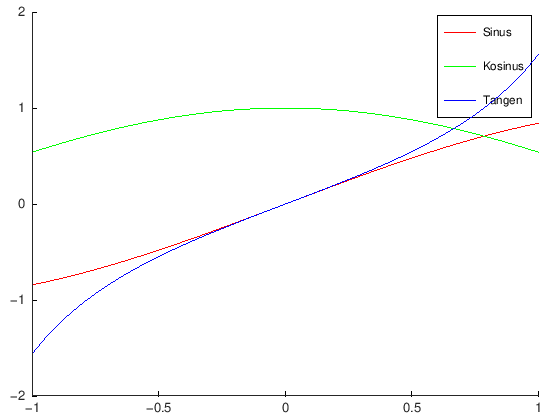

In [36]:
x = -1 : 0.05 : 1;
y1 = sin(x);
y2 = cos(x);
y3 = tan(x);
hold on;
plot(x, y1, 'r');
plot(x, y2, 'g');
plot(x, y3, 'b');
legend("Sinus", "Kosinus", "Tangen");

Sedikit tambahan, kita bisa menyimpan fungsi ke dalam sejenis *array* yang khusus (sehingga bisa diakses melalui indeks), yang bernama ***cell array***.

Misalnya kita ingin menyimpan fungsi $f(x)=3x^2$, $g(x)=6$ (fungsi konstan), dan $h(x,y) = \sin(x) + \cos(y)$, di dalam satu *cell array* bernama `array_fungsi`. Penulisannya menggunakan kurung kurawal `{` `}` dan indeksnya juga menggunakan kurung kurawal, seperti berikut:

In [40]:
f = @(x) 3 * x.^2;
g = @(x) 6;
h = @(x,y) sin(x) + cos(y);
array_fungsi = {f, g, h};

array_fungsi{3}(pi/2, 0)

ans = 2


Perhatikan bahwa kita bisa mengindeks *cell array* tersebut untuk memperoleh suatu fungsi yang kemudian langsung bisa dipanggil. Misalnya, dipilih indeks ketiga yaitu fungsi $h(x,y)$, kemudian langsung dipanggil dengan $x=\frac{\pi}{2}$ dan $y=0$.

Sebenarnya, *cell array* ini adalah sejenis *array* yang bisa menyimpan apapun (tidak seperti *array* biasa yang hanya bisa menyimpan nilai numerik).

In [41]:
test_cell = {9, 8, 7};
test_cell{2} * 3

ans = 24


Namun, *broadcasting* tidak berlaku pada *cell array*, sehingga *cell array* jarang digunakan (toh Octave paling sering digunakan untuk perhitungan numerik).

*Array* biasa dan *cell array* di Octave, bagaikan *array* numpy dan *list* di Python.

## Metode Euler

Metode Euler adalah metode paling dasar dalam mencari solusi dari permasalahan nilai awal dari suatu PD.

Misalkan kita mempunyai suatu persamaan diferensial dengan nilai awal:

$$y^{\prime}=f(t, y), a \leq t \leq b$$
$$y(a)=\alpha$$


maka solusi secara numeriknya adalah $w_i= y(t_i)$, dengan:

$$w_1=\alpha$$
$$w_{i+1}=w_i+h f\left(t_i, w_i\right), \quad i=1,2, \ldots, N$$

dengan $N+1\in \mathbb{N}$ menyatakan banyaknya titik nantinya.

Solusi kita akan berupa titik yang nantinya dapat menggunakan interpolasi untuk nilai yang tidak dimuat di $w_i$

Metode Euler juga bisa ditulis:

$$w_1=\alpha$$

diikuti iterasi untuk $i=1,2, \ldots, N$,

$$m_1 = f\left(t_i, w_i\right)$$
$$w_{i+1}=w_i+h m_1$$

Metode Euler membutuhkan

- fungsi $f\left(t,y\right)$ dalam MNA $y' = f\left(t,y\right)$
- interval $[a,b]$
- niali $N$, agar digunakan $N+1$ titik, yaitu sebagai pembagi dalam perhitungan *step size* $h = \frac{b-a}{N}$
- $\alpha$ (alpha) sebagai nilai awal dalam $y(a) = \alpha$

sehingga programnya (fungsi metode Euler) bisa ditulis sebagai berikut:

In [3]:
function [t, w] = euler(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    w(i + 1) = w(i) + h * m1;
  endfor
endfunction

Sekarang akan kita coba gunakan untuk menyelesaikan suatu MNA (masalah nilai awal) PDB orde 1. Misal diberikan MNA sebagai berikut:

$$y^{\prime}=y-t^2+1$$
$$0 \leq t \leq 2$$
$$y(0)=0.5$$

maka kita dapat mendefinisikan

- `f = @(t, y) y-t^2+1`,
- a=0,
- b=2, dan
- alpha $=0.5$

sehingga untuk $N=10$, diperoleh kode dan hasil sebagai berikut:

In [45]:
f = @(t, y) (y-t^2 + 1);
a = 0;
b = 2;
N = 10;
alpha= 0.5;
[t_euler, w_euler] = euler(f, a, b, N, alpha);

In [46]:
[t_euler, w_euler]

ans =

        0   0.5000
   0.2000   0.8000
   0.4000   1.1520
   0.6000   1.5504
   0.8000   1.9885
   1.0000   2.4582
   1.2000   2.9498
   1.4000   3.4518
   1.6000   3.9501
   1.8000   4.4282
   2.0000   4.8658



Sebenarnya, MNA tersebut bisa dihitung solusi eksaknya, yaitu

$$y(t)=(t+1)^2- 0.5 e^t$$

sehingga kita bisa menghitung *error* metode Euler:

1. Tulis fungsi solusi eksak sebagai *anonymous function*
2. Terapkan fungsi tersebut pada *array* t untuk memperoleh *array* y (yaitu nilai solusi eksak pada tiap nilai t)
3. Hitung mutlak dari selisih antara *array* w (hasil aproksimasi metode Euler) dengan *array* y, untuk memperoleh *array* baru yaitu *error* metode Euler

In [5]:
sln = @(t) (t + 1).^2 - 0.5 * exp(t);
y_eksak = sln(t_euler);
err_euler = abs(y_eksak - w_euler);

Sekarang, kita bisa menampilkan empat kolom berdampingan (membentuk tabel): nilai t, nilai w, nilai y (eksak), dan error.

In [6]:
[t_euler, w_euler, y_eksak, err_euler]

ans =

        0   0.5000   0.5000        0
   0.2000   0.8000   0.8293   0.0293
   0.4000   1.1520   1.2141   0.0621
   0.6000   1.5504   1.6489   0.0985
   0.8000   1.9885   2.1272   0.1387
   1.0000   2.4582   2.6409   0.1827
   1.2000   2.9498   3.1799   0.2301
   1.4000   3.4518   3.7324   0.2806
   1.6000   3.9501   4.2835   0.3334
   1.8000   4.4282   4.8152   0.3870
   2.0000   4.8658   5.3055   0.4397



Untuk visualisasinya, kita akan membuat plot dari hasil yang kita peroleh.

Kita tambahkan kode berikut pada file, untuk membandingkan *plot* solusi eksak dengan *plot* dari titik-titik hasil algoritma.

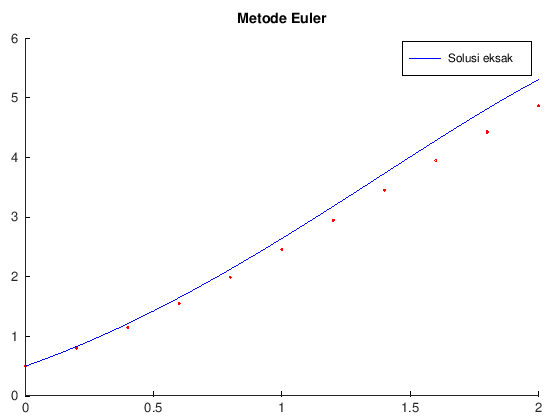

In [7]:
hold on;
fplot(sln, [0, 2], 'b');
scatter(t_euler, w_euler, 'r');
legend('Solusi eksak', 'Metode Euler');
title("Metode Euler");

Saat dijalankan, akan muncul jendela pop-up yang berisi plot yang telah dibuat.

![](./pdnum2_Picture1.png)

Penjelasan:

* sln berisi fungsi referensi kita untuk di-plot dan dibandingkan.
* fplot(f, [a, b]) akan menampilkan plot dari suatu fungsi f dengan domain [a, b]. Argumen tambahan ‘b’ memberi warna biru pada plot.
* hold on akan menahan plot yang ada agar kita bisa menampilkan banyak plot sekaligus.
* scatter(x, y) akan menampilkan x-y scatter plot.
* legend memberi legenda/keterangan pada plot yang telah dibuat. Legenda tersebut dimasukkan berurutan mulai dari plot yang didefinsikan terlebih dahulu
* title memberi judul pada plot

Secara keseluruhan, kodenya menjadi seperti berikut.

ans =

        0   0.5000   0.5000        0
   0.2000   0.8000   0.8293   0.0293
   0.4000   1.1520   1.2141   0.0621
   0.6000   1.5504   1.6489   0.0985
   0.8000   1.9885   2.1272   0.1387
   1.0000   2.4582   2.6409   0.1827
   1.2000   2.9498   3.1799   0.2301
   1.4000   3.4518   3.7324   0.2806
   1.6000   3.9501   4.2835   0.3334
   1.8000   4.4282   4.8152   0.3870
   2.0000   4.8658   5.3055   0.4397



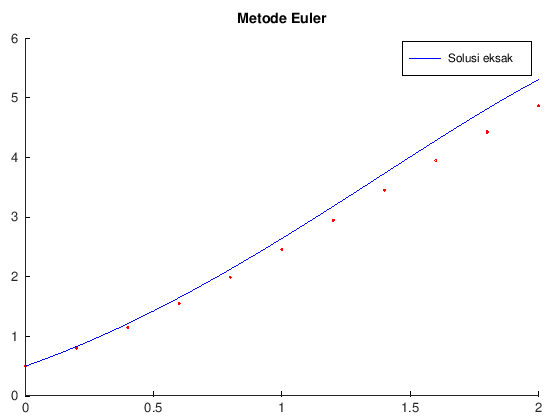

In [4]:
% setup
f = @(t, y) (y-t^2 + 1);
a = 0;
b = 2;
N = 10;
alpha= 0.5;

% hitung metode Euler
[t_euler, w_euler] = euler(f, a, b, N, alpha);

% solusi eksak
sln = @(t) (t + 1).^2 - 0.5 * exp(t);
y_eksak = sln(t_euler); % hitung solusi eksak di tiap titik t

% error: nilai mutlak dari selisih
err_euler = abs(y_eksak - w_euler);

% tampilkan sejumlah kolom menjadi seperti tabel
[t_euler, w_euler, y_eksak, err_euler]

% plotting
hold on;
fplot(sln, [0, 2], 'b');
scatter(t_euler, w_euler, 'r');
legend('Solusi eksak', 'Metode Euler');
title("Metode Euler");

## Metode Taylor orde $n$

Metode Taylor orde $n$ adalah perluasan dari metode Euler (di mana metode Taylor orde 1 sama saja dengan metode Euler). Rumus iterasinya bisa ditulis sebagai berikut:

$$w_1 = \alpha$$

\begin{align*}
T^{(n)} \left(t_i, w_i\right) &= f\left(t_i, w_i\right) + \frac{h}{2}f'\left(t_i, w_i\right) + \cdots + \frac{h^{n-1}}{n!} f^{\left(n-1\right)} \left(t_i,w_i\right) \\
\end{align*}

$$w_{i+1} = w_i + hT^{(n)} \left(t_i, w_i\right) $$

Perhatikan bahwa, dengan metode Taylor orde $n$, kita perlu memperoleh terlebih dahulu rumus analitik untuk sejumlah turunan (terhadap $t$) dari $f\left(t_i, w_i\right)$ yaitu $f', f'', \dots, f^{(n-1)}$.

Kebetulan, untuk metode Euler, yaitu metode Taylor orde 1 ($n=1$), kita tidak perlu menghitung turunan fungsinya sama sekali.

Untuk mempermudah pemrograman, kita coba tulis ulang rumus $T^{(n)} \left(t_i, w_i\right)$ dengan sumasi:

\begin{align*}
T^{(n)} \left(t_i, w_i\right) &= f\left(t_i, w_i\right) + \frac{h}{2}f'\left(t_i, w_i\right) + \cdots + \frac{h^{n-1}}{n!} f^{\left(n-1\right)} \left(t_i,w_i\right) \\
&= \sum_{j=1}^{n} \frac{h^{j-1}}{j!} f^{\left(j-1\right)} \left(t_i,w_i\right) \\
&= f\left(t_i,w_i\right) + \sum_{j=2}^{n} \frac{h^{j-1}}{j!} f^{\left(j-1\right)} \left(t_i,w_i\right)
\end{align*}

Dengan demikian, kita bisa menyimpan fungsi-fungsi $f', f'', \dots, f^{(n-1)}$ di dalam suatu *cell array*, misal dinamakan `fp`, sehingga

- kita bisa mengakses turunan ke-$i$ dengan menulis `fp{i}`
- orde $n$ untuk metode Taylor bisa ditentukan menggunakan panjang *cell array* tersebut, yaitu `n = length(fp) + 1;`
- jika *cell array* kosong (tidak ada fungsi turunan), otomatis $n=1$ dan algoritmanya menjadi sama saja dengan metode Euler (sesuai harapan)
- penjumlahannya bisa menggunakan *for loop* sederhana
- kita cukup mendefinisikan fungsi metode Taylor ini sekali saja di Octave, daripada harus membuat definisi terpisah untuk orde 2, orde 3, orde 4, dan seterusnya (di mana banyaknya fungsi turunan memang berbeda)

Setelah manipulasi tersebut, secara keseluruhan, metode Taylor orde $n$ bisa ditulis:

$$w_1 = \alpha$$

\begin{align*}
T^{(n)} \left(t_i, w_i\right) &= f\left(t_i, w_i\right) + \frac{h}{2}f'\left(t_i, w_i\right) + \cdots + \frac{h^{n-1}}{n!} f^{\left(n-1\right)} \left(t_i,w_i\right) \\
&= \sum_{j=1}^{n} \frac{h^{j-1}}{j!} f^{\left(j-1\right)} \left(t_i,w_i\right) \\
&= f\left(t_i,w_i\right) + \sum_{j=2}^{n} \frac{h^{j-1}}{j!} f^{\left(j-1\right)} \left(t_i,w_i\right)
\end{align*}

$$w_{i+1} = w_i + hT^{(n)} \left(t_i, w_i\right) $$

Atau lebih singkatnya:

$$w_1 = \alpha$$

$$T^{(n)} \left(t_i, w_i\right) = f\left(t_i,w_i\right) + \sum_{j=2}^{n} \frac{h^{j-1}}{j!} f^{\left(j-1\right)} \left(t_i,w_i\right)$$

$$w_{i+1} = w_i + hT^{(n)} \left(t_i, w_i\right) $$

In [10]:
function [t, w] = taylor(f, fp, a, b, N, alpha)
  h = (b - a) / N;
  n = length(fp) + 1;
  t = zeros(n + 1, 1);
  w = zeros(n + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    
    T = f(t(i), w(i));
    for j = 2 : n
      T += h^(j-1) * fp{j-1}(t(i),w(i)) / factorial(j);
    endfor
    
    w(i + 1) = w(i) + h * T;
  endfor
endfunction

Contoh penggunaan:

Misalkan diberikan MNA sebagai berikut, yang diminta untuk diselesaikan secara numerik dengan metode Taylor orde 4:

$$y' = y - t^2 + 1$$
$$0 \le t \le 2$$
$$y(0) = 0.5$$

Maka, dengan $y' = f\left(t, y\right) = y - t^2 + 1$, bisa dihitung:

$$f'\left(t, y\right) = y - t^2 + 1 - 2t$$

$$f''\left(t, y\right) = y - t^2 - 2t - 1$$

$$f^{(3)}\left(t, y\right) = y - t^2 - 2t - 1, \hspace{0.2cm} \text{kebetulan sama persis dengan} \hspace{0.2cm} f''\left(t, y\right)$$

In [51]:
% contoh pakai: subbab 5.3 example 1b (orde 4)

% f(t_i, w_i)
f0 = @(t,y) y - t^2 + 1;

% f'(t_i, w_i)
f1 = @(t,y) y - t^2 + 1 - 2*t;

% f''(t_i, w_i)
f2 = @(t,y) y - t^2 - 2*t - 1;

% f'''(t_i, w_i)
f3 = @(t,y) y - t^2 - 2*t - 1;

% hitung pada interval [0,2], N=10, y(0)=alpha=0.5
[t, w] = taylor(f0, {f1, f2, f3}, 0, 2, 10, 0.5);
% otomatis Taylor orde 4 karena
% ada tiga fungsi turunan f1, f2, f3
% yang diinput di cell array

% bandingkan dengan Tabel 5.4
[t, w]

ans =

        0   0.5000
   0.2000   0.8293
   0.4000   1.2141
   0.6000   1.6489
   0.8000   2.1272
   1.0000   2.6409
   1.2000   3.1800
   1.4000   3.7324
   1.6000   4.2835
   1.8000   4.8152
   2.0000   5.3056



Kita bisa membandingkan antara solusi eksak, metode Euler, dan metode Taylor orde 4, baik dalam menampilkan tabel iterasi maupun menampilkan *plot*:

ans =

        0   0.5000   0.5000   0.5000
   0.2000   0.8000   0.8293   0.8293
   0.4000   1.1520   1.2141   1.2141
   0.6000   1.5504   1.6489   1.6489
   0.8000   1.9885   2.1272   2.1272
   1.0000   2.4582   2.6409   2.6409
   1.2000   2.9498   3.1800   3.1799
   1.4000   3.4518   3.7324   3.7324
   1.6000   3.9501   4.2835   4.2835
   1.8000   4.4282   4.8152   4.8152
   2.0000   4.8658   5.3056   5.3055



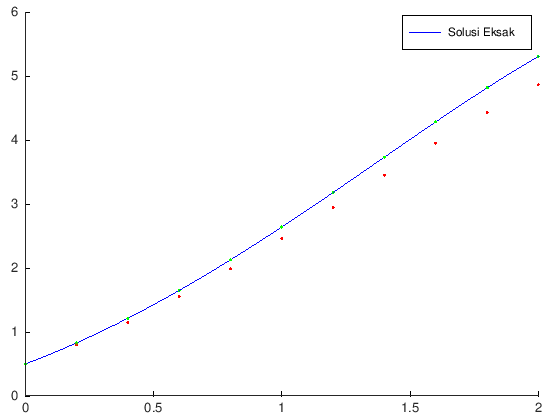

In [11]:
% fungsi f(t,y) dan turunan pertama, kedua, ketiga
f0 = @(t,y) y - t^2 + 1;
f1 = @(t,y) y - t^2 + 1 - 2*t;
f2 = @(t,y) y - t^2 - 2*t - 1;
f3 = @(t,y) y - t^2 - 2*t - 1;

a = 0;
b = 2;
N = 10;
alpha = 0.5;

% menghitung metode Euler dan metode Taylor orde 4
[t_euler, w_euler] = euler(f0, a, b, N, alpha);
[t_taylor, w_taylor] = taylor(f0, {f1,f2,f3}, a, b, N, alpha);

% solusi eksak
sln = @(t) (t + 1).^2 - 0.5 * exp(t);
y_eksak = sln(t_euler);

% tampilkan tabel
[t_euler, w_euler, w_taylor, y_eksak]

% plotting
hold on;
fplot(sln, [0,2], 'b');
scatter(t_euler, w_euler, 'r');
scatter(t_taylor, w_taylor, 'g');
legend("Solusi Eksak", "Metode Euler", "Metode Taylor");


## Metode Runge-Kutta dan variasinya

### Orde 2: Metode Midpoint

$$w_1=\alpha$$
$$w_{i+1}=w_i+h f\left(t_i+\frac{h}{2}, w_i+\frac{h}{2} f\left(t_i, w_i\right)\right)$$

bisa juga ditulis,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$w_{i+1}=w_i+h f\left(t_i+\frac{h}{2}, w_i+\frac{h}{2} m_1\right)$$

atau bahkan,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$m_2 = f\left(t_i+\frac{h}{2}, w_i+\frac{h}{2} m_1\right)$$
$$w_{i+1}=w_i+h m_2$$

In [7]:
function [t, w] = midpoint(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i) + (h / 2), w(i) + (h / 2) * m1);
    w(i + 1) = w(i) + h * m2;
  endfor
endfunction

### Orde 2: Metode *Modified Euler*

$$w_1=\alpha$$
$$w_{i+1}=w_i+\frac{h}{2}\left(f\left(t_i, w_i\right)+f\left(t_{i+1}, w_i+h f\left(t_i, w_i\right)\right)\right)$$

bisa juga ditulis,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$w_{i+1}=w_i+\frac{h}{2}\left(m_1+f\left(t_{i+1}, w_i+h m_1\right)\right)$$

atau bahkan,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$m_2 = f\left(t_{i+1}, w_i+h m_1\right)$$
$$w_{i+1}=w_i+\frac{h}{2}\left(m_1+m_2\right)$$

In [8]:
function [t, w] = modified_euler(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i + 1), w(i) + h * m1);
    w(i + 1) = w(i) + h * (m1 + m2) / 2;
  endfor
endfunction

### Orde 3: Metode Heun

$$w_1=\alpha$$
$$w_{i+1}=w_i+\frac{h}{4}\left(f\left(t_i, w_i\right)+3 f\left(t_i+\frac{2 h}{3}, w_i+\frac{2 h}{3} f\left(t_i+\frac{h}{3}, w_i+\frac{h}{3} f\left(t_i, w_i\right)\right)\right)\right)$$

bisa juga ditulis,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$w_{i+1}=w_i+\frac{h}{4}\left(m_1+3 f\left(t_i+\frac{2 h}{3}, w_i+\frac{2 h}{3} f\left(t_i+\frac{h}{3}, w_i+\frac{h}{3} m_1\right)\right)\right)$$

atau,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$m_2 = f\left(t_i+\frac{h}{3}, w_i+\frac{h}{3} m_1\right)$$
$$w_{i+1}=w_i+\frac{h}{4}\left(m_1+3 f\left(t_i+\frac{2 h}{3}, w_i+\frac{2 h}{3} m_2\right)\right)$$

atau bahkan,

$$w_1=\alpha$$
$$m_1 = f\left(t_i, w_i\right)$$
$$m_2 = f\left(t_i+\frac{h}{3}, w_i+\frac{h}{3} m_1\right)$$
$$m_3 = f\left(t_i+\frac{2 h}{3}, w_i+\frac{2 h}{3} m_2\right)$$
$$w_{i+1}=w_i+\frac{h}{4}\left(m_1+3 m_3\right)$$

In [9]:
function [t, w] = heun(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i) + (h / 3), w(i) + (h / 3) * m1);
    m3 = f(t(i) + (2 * h / 3), w(i) + (2 * h / 3) * m2);
    w(i + 1) = w(i) + (h / 4) * (m1 + 3 * m3);
  endfor
endfunction

### Metode Runge-Kutta orde 4

$$w_1=\alpha$$
$$k_1=h f\left(t_i, w_i\right)$$
$$k_2=h f\left(t_i+\frac{h}{2}, w_i+\frac{k_1}{2}\right)$$
$$k_3=h f\left(t_i+\frac{h}{2}, w_i+\frac{k_2}{2}\right)$$
$$k_4=h f\left(t_{i+1}, w_i+k_3\right)$$
$$w_{i+1}=w_i+\frac{1}{6}\left(k_1+2 k_2+2 k_3+k_4\right)$$

In [10]:
function [t, w] = rko4(f, a, b, N, alpha)
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    k1 = h * f(t(i), w(i));
    k2 = h * f(t(i) + (h / 2), w(i) + (k1 / 2));
    k3 = h * f(t(i) + (h / 2), w(i) + (k2 / 2));
    k4 = h * f(t(i + 1), w(i) + k3);
    w(i + 1) = w(i) + (k1 + 2 * k2 + 2 * k3 + k4) / 6;
  endfor
endfunction

### Contoh penggunaan

Misalkan diberikan MNA sebagai berikut:

$$y' = y - t^2 + 1$$
$$0 \le t \le 2$$
$$y(0) = 0.5$$

In [24]:
f = @(t, y) (y - t .^ 2 + 1);
a = 0;
b = 2;
alpha = 0.5;
[t1, w1] = midpoint(f, a, b, 10, alpha);
[t2, w2] = modified_euler(f, a, b, 10, alpha);
[t3, w3] = heun(f, a, b, 10, alpha);
[t4, w4] = rko4(f, a, b, 10, alpha);

sln = @(t) (t + 1) .^ 2 - 0.5 * exp(t);

t5 = linspace(a, b, 11);
w5 = sln(t5);

In [25]:
[t1, w1, w2, w3, w4, w5']

ans =

        0   0.5000   0.5000   0.5000   0.5000   0.5000
   0.2000   0.8280   0.8260   0.8292   0.8293   0.8293
   0.4000   1.2114   1.2069   1.2140   1.2141   1.2141
   0.6000   1.6447   1.6372   1.6488   1.6489   1.6489
   0.8000   2.1213   2.1102   2.1270   2.1272   2.1272
   1.0000   2.6332   2.6177   2.6406   2.6408   2.6409
   1.2000   3.1705   3.1496   3.1796   3.1799   3.1799
   1.4000   3.7212   3.6937   3.7320   3.7323   3.7324
   1.6000   4.2706   4.2351   4.2830   4.2834   4.2835
   1.8000   4.8010   4.7556   4.8147   4.8151   4.8152
   2.0000   5.2904   5.2331   5.3050   5.3054   5.3055



In [ ]:
fplot(sln, [0, 2], 'k');
hold on;
scatter(t1, w1, 'r');
scatter(t2, w2, 'g');
scatter(t3, w3, 'b');
scatter(t4, w4, 'm');
legend('Fungsi eksak', 'Midpoint', 'Modified Euler', 'Heun',
'Runge-Kutta orde 4');
legend("location", "northwest");
title('Perbandingan metode Runge-Kutta');

![](./pdnum2_Picture2.png)